## What is Image Processing?

Image processing is the field of study and application that deals with modifying and analyzing digital images using computer algorithms. The goal of image processing is to enhance the visual quality of images, extract useful information, and make images suitable for further analysis or interpretation.

 

## We will make the following operations most commonly uses for data augmentation task which training the model in computer Vision.

1. Image Resizing

2. Image Rotation

3. Image Translation

4. Image Shearing

5. Image Normalization
6. Edge detection in an Image

7. Image Blurring

8. Morphological Image Processing

## Image Resizing

### The cv2.resize() function is used to resize an python image in OpenCV. 

#### syntax --> cv2.resize(src, dsize,interpolation)

src          :The image to be resized.

dsize        :The desired width and height of the resized image.

interpolation:The interpolation method to be used.

When the python image is resized, the interpolation method defines how the new pixels are computed. There are several interpolation techniques, each of which has its own quality vs. speed trade-offs.

It is important to note that resizing an image can reduce its quality. This is because the new pixels are calculated by interpolating between the existing pixels, and this can introduce some blurring.

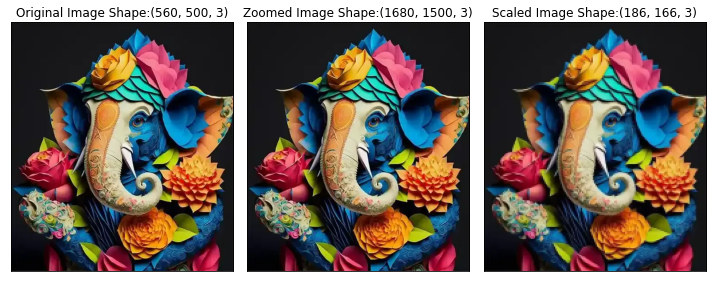

In [1]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Ganeshji.webp')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the scale factor
# Increase the size by 3 times
scale_factor_1 = 3.0
# Decrease the size by 3 times
scale_factor_2 = 1/3.0

# Get the original image dimensions
height, width = image_rgb.shape[:2]

# Calculate the new image dimensions
new_height = int(height * scale_factor_1)
new_width = int(width * scale_factor_1)

# Resize the image
zoomed_image = cv2.resize(src =image_rgb, dsize=(new_width, new_height), interpolation=cv2.INTER_CUBIC)

# Calculate the new image dimensions
new_height1 = int(height * scale_factor_2)
new_width1 = int(width * scale_factor_2)

# Scaled image
scaled_image = cv2.resize(src= image_rgb, 
dsize =(new_width1, new_height1), interpolation=cv2.INTER_AREA)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image Shape:'+str(image_rgb.shape))

# Plot the Zoomed Image
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image Shape:'+str(zoomed_image.shape))

# Plot the Scaled Image
axs[2].imshow(scaled_image)
axs[2].set_title('Scaled Image Shape:'+str(scaled_image.shape))

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
# Display the subplots
plt.tight_layout()
plt.show()


## Image Rotation
 

### Images can be rotated to any degree clockwise or otherwise. We just need to define rotation matrix listing rotation point, degree of rotation and the scaling factor. 

#### cv2.getRotationMatrix2D() :
              This function is used to create a rotation matrix for an image. It takes the following arguments:

The center of rotation for the image.

The angle of rotation in degrees.

The scale factor.

#### cv2.warpAffine():
          This function is used to apply a transformation matrix to an image. It takes the following arguments:

The python image to be transformed.

The transformation matrix.

The output image size.

The rotation angle can be positive or negative. A positive angle rotates the image clockwise, while a negative angle rotates the image counterclockwise.

The scale factor can be used to scale the image up or down. A scale factor of 1 will keep the image the same size, while a scale factor of 2 will double the size of the python image.

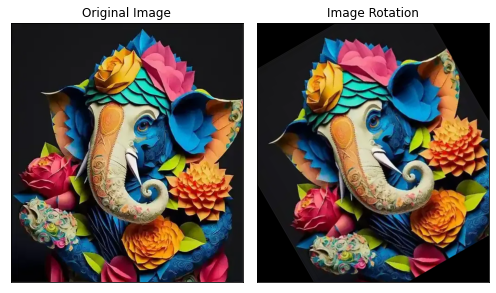

In [2]:
# Read image from disk.
img = cv2.imread('Ganeshji.webp')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image rotation parameter
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 1

# getRotationMatrix2D creates a matrix needed for transformation.
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# We want matrix for rotation w.r.t center to 30 degree without scaling.
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (image.shape[1], image.shape[0]))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Rotated image
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


## Image Translation
 

### Translating an image means shifting it within a given frame of reference that can be along the x-axis and y-axis.

#### To translate an image using OpenCV,
we need to create a transformation matrix. This matrix is a 2×3 matrix that specifies the amount of translation in each direction.
#### The cv2.warpAffine() function is used to apply a transformation matrix to an image. It takes the following arguments:

The image to be transformed.

The transformation matrix.

The output image size.

The translation parameters are specified in the transformation matrix as the tx and ty elements. The tx element specifies the amount of translation in the x-axis, while the ty element specifies the amount of translation in the y-axis.

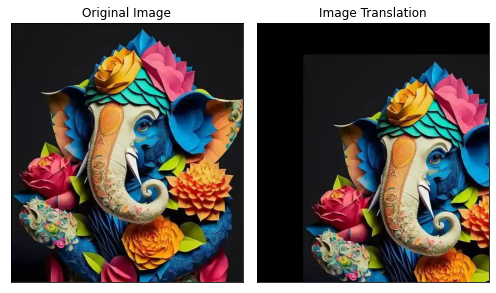

In [3]:
# Import the necessary Libraries
import cv2
import matplotlib.pyplot as plt

# Read image from disk.
img = cv2.imread('Ganeshji.webp')
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

width = image_rgb.shape[1]
height = image_rgb.shape[0]

tx = 100
ty = 70

# Translation matrix
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
# warpAffine does appropriate shifting given the Translation matrix.
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the transalted image
axs[1].imshow(translated_image)
axs[1].set_title('Image Translation')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


# Image shearing
#### it is a geometric transformation that skews an image along one or both axes i.e x or y axis.

#### To shear an image using OpenCV, we need to create a transformation matrix. This matrix is a 2×3 matrix that specifies the amount of shearing in each direction.
#### cv2.warpAffine():
 This function is used to apply a transformation matrix to an image. It takes the following arguments:
The image to be transformed.

The transformation matrix.

The output image size.

The shearing parameters are specified in the transformation matrix as the shearX shearY elements. The shearX element specifies the amount of shearing in the x-axis, while the shearY element specifies the amount of shearing in the y-axis.


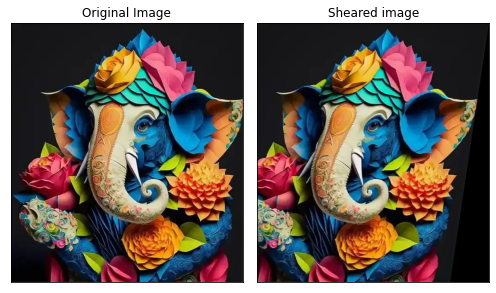

In [4]:
# Load the image
image = cv2.imread('Ganeshji.webp')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image shape along X and Y
width = image_rgb.shape[1]
height = image_rgb.shape[0]

# Define the Shearing factor
shearX = -0.15
shearY = 0

# Define the Transformation matrix for shearing
transformation_matrix = np.array([[1, shearX, 0], [0, 1, shearY]], dtype=np.float32)
# Apply shearing
sheared_image = cv2.warpAffine(image_rgb, transformation_matrix, (width, height))

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the Sheared image
axs[1].imshow(sheared_image)
axs[1].set_title('Sheared image')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


# Image Normalization
Image normalization is a process of scaling the pixel values in an image to a specific range.This is often done to improve the performance of image processing algorithms, as many algorithms work better when the pixel values are within a certain range.

### cv2.normalize():
 This function is used to normalize an image. This function takes the following arguments:
 
--->The input image.

--->The output image.

--->The minimum and maximum values of the normalized image.

--->The normalization type.

--->The dtype of the output image.

--->The normalization type specifies how the pixel values are scaled. There are several different normalization types available, each with its own trade-offs between accuracy and speed.

--->Image normalization is a common preprocessing step in many image processing tasks. It can help to improve the performance of algorithms such as image classification, object detection, and image segmentation. 

[[0.08627451 0.08627451 0.08627451 ... 0.08627451 0.10588235 0.16078431]
 [0.08627451 0.08627451 0.08627451 ... 0.05882353 0.08235294 0.1372549 ]
 [0.08627451 0.08627451 0.08627451 ... 0.0745098  0.09411765 0.14901961]
 ...
 [0.08235294 0.02745098 0.00784314 ... 0.08235294 0.09019608 0.11764706]
 [0.10588235 0.05098039 0.03137255 ... 0.09019608 0.09803922 0.1254902 ]
 [0.11764706 0.0627451  0.04705882 ... 0.09803922 0.10980392 0.1372549 ]]


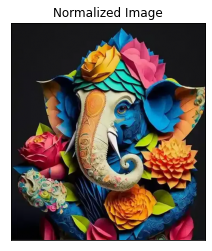

In [5]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Ganeshji.webp')

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into channels
b, g, r = cv2.split(image_rgb)

# Normalization parameter
min_value = 0
max_value = 1
norm_type = cv2.NORM_MINMAX

# Normalize each channel
b_normalized = cv2.normalize(b.astype('float'), None, min_value, max_value, norm_type)
g_normalized = cv2.normalize(g.astype('float'), None, min_value, max_value, norm_type)
r_normalized = cv2.normalize(r.astype('float'), None, min_value, max_value, norm_type)

# Merge the normalized channels back into an image
normalized_image = cv2.merge((b_normalized, g_normalized, r_normalized))
# Normalized image
print(normalized_image[:,:,0])

plt.imshow(normalized_image)
plt.xticks([])
plt.yticks([])
plt.title('Normalized Image')
plt.show()


# Edge detection of Image


The process of image edge detection involves detecting sharp edges in the image. This edge detection is essential in the context of image recognition or object localization/detection. There are several algorithms for detecting edges due to its wide applicability.
--->Canny Edge Detection is a well-liked edge detection approach.
The multi-stage Canny edge detection method includes the following steps:

--->Gaussian smoothing: The image is smoothed using a Gaussian filter to remove noise.

--->Gradient calculation: The gradient of the image is calculated using the Sobel operator.

--->Non-maximum suppression: Non-maximum suppression is applied to the gradient image to remove spurious edges.

--->Hysteresis thresholding: Hysteresis thresholding is applied to the gradient image to identify strong and weak edges.
##### The Canny edge detector is a powerful edge detection algorithm that can produce high-quality edge images. However, it can also be computationally expensive.



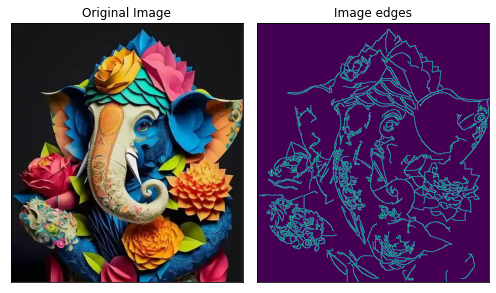

In [6]:
# Read image from disk.
img = cv2.imread('Ganeshji.webp')
# Convert BGR image to RGB
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply Canny edge detection
edges = cv2.Canny(image= image_rgb, threshold1=100, threshold2=700)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(7, 4))

# Plot the original image
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

# Plot the blurred image
axs[1].imshow(edges)
axs[1].set_title('Image edges')

# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()


In [7]:
# Image blurring refer to blurring.ipynb

## Morphological Image Processing 

Morphological image processing is a set of python image processing techniques based on the geometry of objects in an image. These procedures are commonly used to eliminate noise, separate objects, and detect edges in images.

Two of the most common morphological operations are:

### Dilation:
This operation expands the boundaries of objects in an image.

It is useful for removing small white noises.

Used to detach two connected objects etc.
### Working of Dilation:
A kernel(a matrix of odd size(3,5,7) is convolved with the image.

A pixel element in the original image is ‘1’ if at least one pixel under the kernel is ‘1’.

It increases the white region in the image or the size of the foreground object increases. 



### Erosion: 
This operation shrinks the boundaries of objects in an image.
In cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases.

It is also useful in joining broken parts of an object.
### Working of Erosion:
A kernel(a matrix of odd size(3,5,7) is convolved with the image.

A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel are 1, otherwise, it is eroded (made to zero).

Thus all the pixels near the boundary will be discarded depending upon the size of the kernel.

So the thickness or size of the foreground object decreases or simply the white region decreases in the image.



Morphological procedures are often used in conjunction with other image processing methods like segmentation and edge detection.



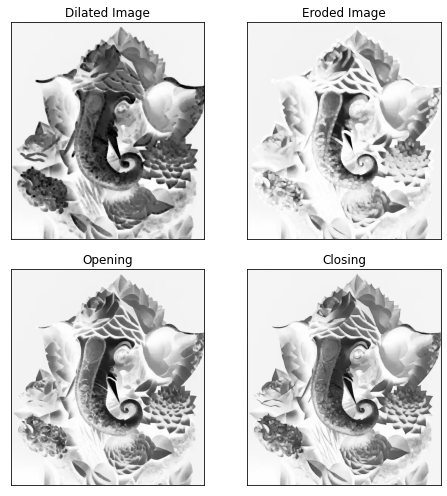

In [8]:
# Import the necessary Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Ganeshji.webp')

# Convert BGR image to gray
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Create a structuring element
kernel = np.ones((3, 3), np.uint8)

# Perform dilation
dilated = cv2.dilate(image_gray, kernel, iterations=2)

# Perform erosion
eroded = cv2.erode(image_gray, kernel, iterations=2)

# Perform opening (erosion followed by dilation)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)

# Perform closing (dilation followed by erosion)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Plot the Dilated Image
axs[0,0].imshow(dilated, cmap='Greys')
axs[0,0].set_title('Dilated Image')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

# Plot the Eroded Image
axs[0,1].imshow(eroded, cmap='Greys')
axs[0,1].set_title('Eroded Image')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

# Plot the opening (erosion followed by dilation)
axs[1,0].imshow(opening, cmap='Greys')
axs[1,0].set_title('Opening')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

# Plot the closing (dilation followed by erosion)
axs[1,1].imshow(closing, cmap='Greys')
axs[1,1].set_title('Closing')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()
